#### Problem Statement
- We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. hey can accordingly manipulate the design of the cars, the business stategy etc to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

#### Import Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestRegressor
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize']= (12,8)
sns.set_style('darkgrid')
sns.set_palette('hls')
pd.set_option('display.max_columns', 200)
pd.set_option('expand_frame_repr', True)

#### Read CSV File

In [2]:
car_price = pd.read_csv('CarPrice_Assignment.csv')
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Understanding the Dataset

In [3]:
#checking the shape of the dataset

car_price.shape

(205, 26)

In [4]:
#information about the data set

car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Data Cleaning and Preprocessing

In [157]:
#check for missing values

car_price.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#drop the car ID column, it's the same as the index and is of no use.

car_price = car_price.drop('car_ID', axis = 1)

In [6]:
#changing the data type of the symboling column to string based on the data description.

car_price['symboling']= car_price['symboling'].astype(str)

In [7]:
#extract the car company from the car name and create a new column called car company

new = car_price['CarName'].str.split(" ",n=1, expand=True)

car_price['CarModel'] = new[1]
car_price['CarName']= new[0]


#### Summary Statistics

In [8]:
#summary statistics of numerical columns

car_price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#summary statistics of categorical columns

car_price.describe(include=['object'])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarModel
count,205,205,205,205,205,205,205,205,205,205,205,203
unique,6,28,2,2,2,5,3,2,7,7,8,141
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,corolla
freq,67,31,185,168,115,96,120,202,148,159,94,6


##### Insights:
 - The maximum price is 45,400 and the average price is approximately 7,788.# - The minimum car length is 141.1 and the maximum is 208.1.
 - The minimum car width is 60.3 and the maximum is 72.3.
 - The lowest car has height 47.8 and the highest car  has height 59.8.
 - There are 22 unique car companies and these 22 companies have 141 unique car models.
 - Toyota is the most common car company and Corolla is the most common car model.
 - Most of the cars were assigned a risk factor (symboling) of zero.
 - Gas is the most used fuel type.
 - The most favoured car body is sedan.
 - Most of the engine of the cars are located in front.
 - The most used engine type is the ohc.
 - There are 8 different fuel sysyems and the most used is the mpfi.

#### Detecting Outliers

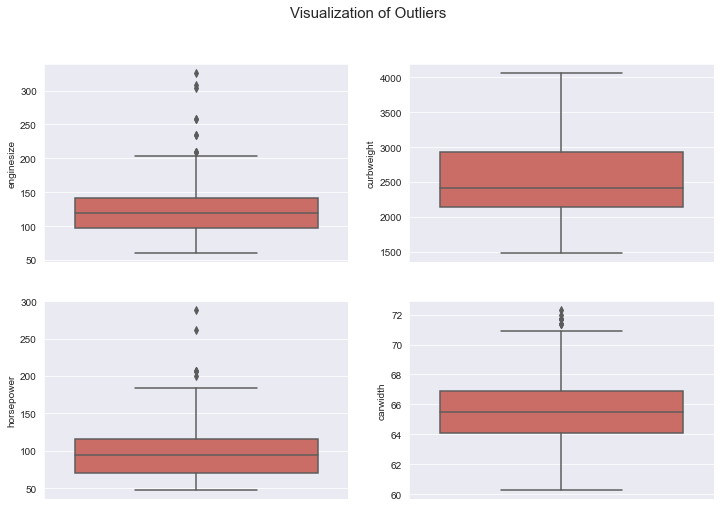

In [156]:
#detecting outliers using boxplot
#plotting a boxplot with four axis: Engine size, curbweight, horse power and car width.

out = plt.figure(figsize=(12,8))
out.suptitle('Visualization of Outliers', size=15)

axis1 = out.add_subplot(2,2,1)
sns.boxplot(data=car_price, y = 'enginesize')

axis2 = out.add_subplot(2,2,2)
sns.boxplot(data=car_price, y = 'curbweight')

axis3 = out.add_subplot(2,2,3)
sns.boxplot(data=car_price, y = 'horsepower')

axis4 = out.add_subplot(2,2,4)
sns.boxplot(data=car_price, y = 'carwidth');




#### Insight:
- These features have outliers, but we decided not to drop the outliers rather they were used in building our model since we couldn't explain the reason for the outliers.

#### Exploratory Data Analysis

In [10]:
#Before getting the dummy variables, i will drop the column car model as it's not needed in the analysis, 
#only the car name is needed.

car_price = car_price.drop('CarModel', axis = 1)

#### 1. Histogram to check Price Distribution

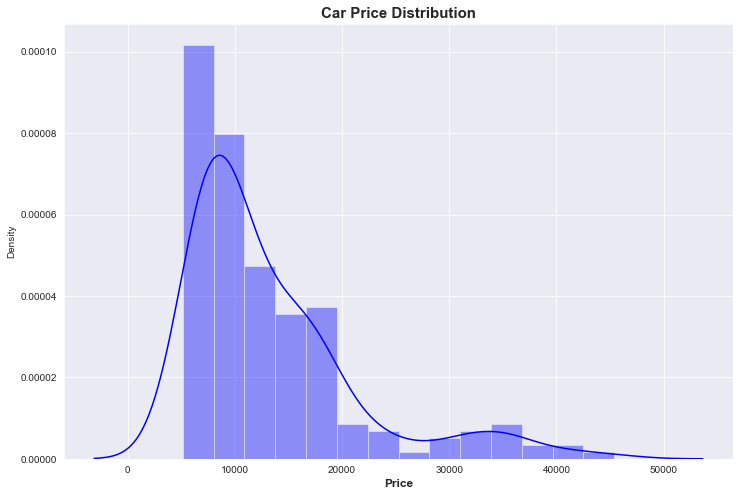

In [11]:
sns.distplot(car_price['price'], kde = True, color= 'blue')
plt.title('Car Price Distribution',fontweight='bold', fontsize=15)
plt.xlabel('Price',fontweight='bold',fontsize=12);

 ##### Insights:
 - The car price distribution is right skewed.
 - A large percentage of the car prices tends to fall below 15,000, while only a few car prices fall under higher prices

#### Visualizing Numerical Variables

In [12]:
numerical = car_price.select_dtypes(include=['float64', 'int'])

numerical.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


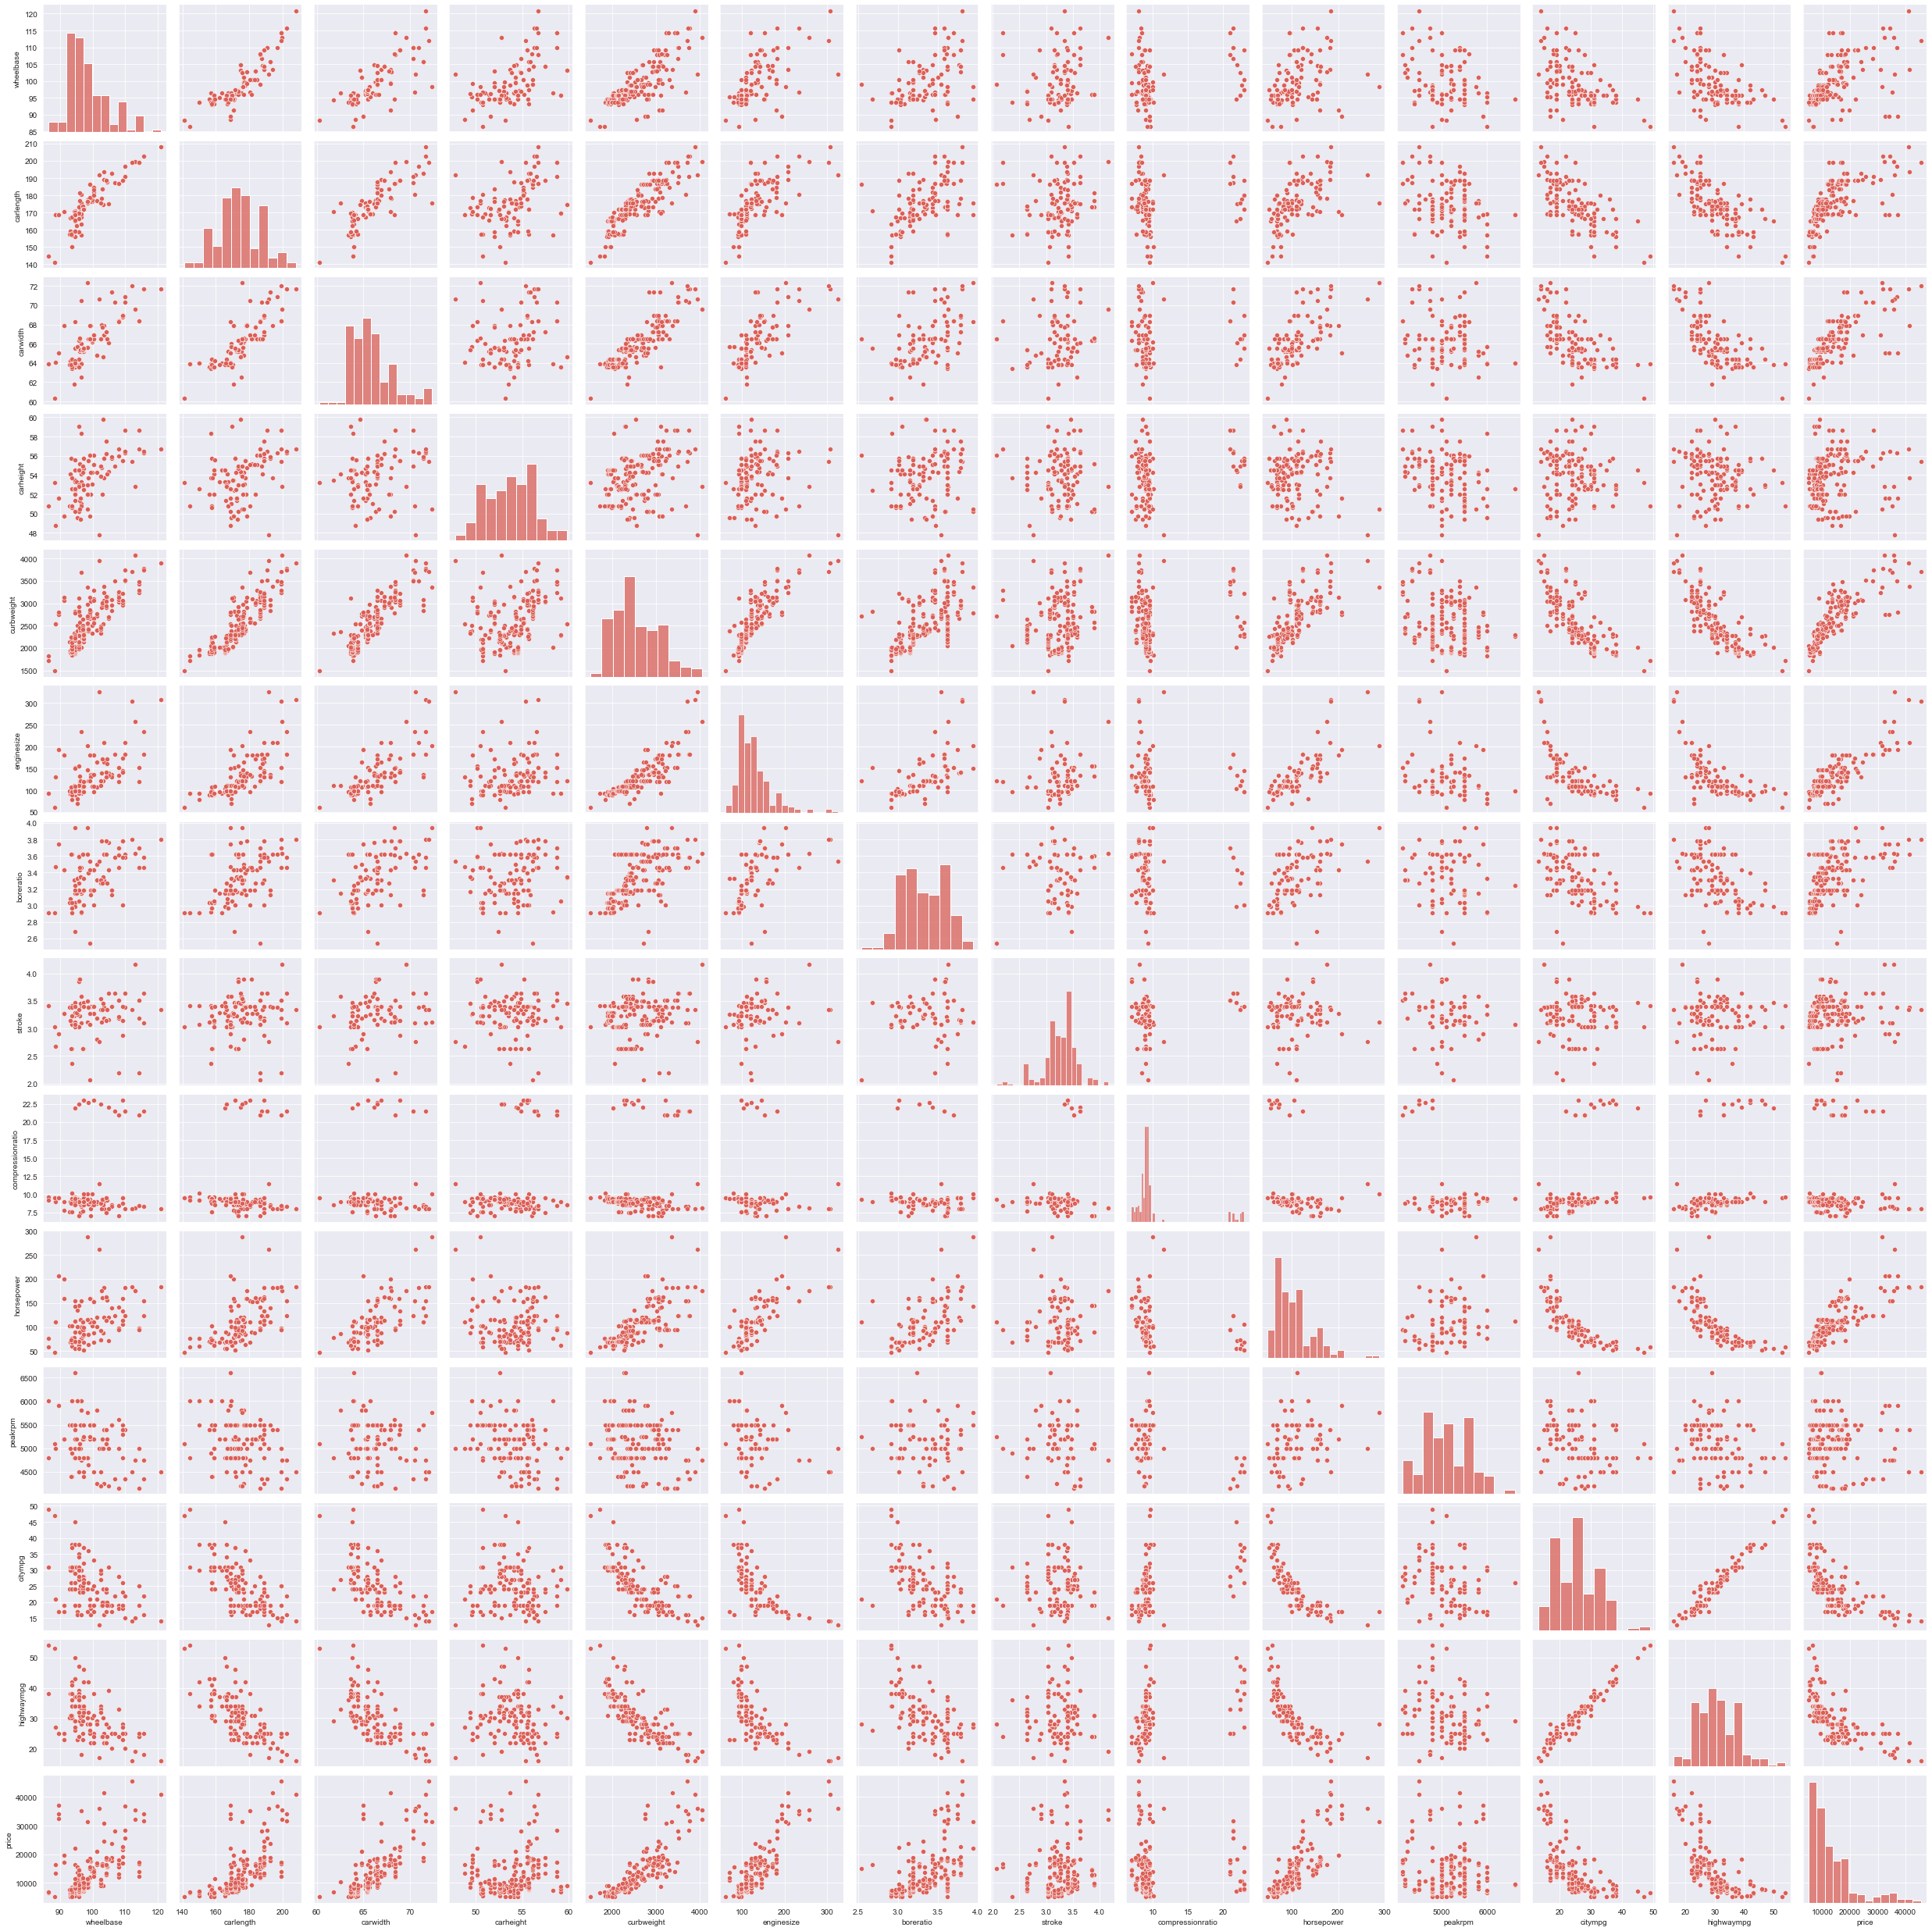

In [13]:
#create a pairplot

sns.pairplot(numerical);

#### Investigating Relationships

#### 1. Compression Ratio vs Price

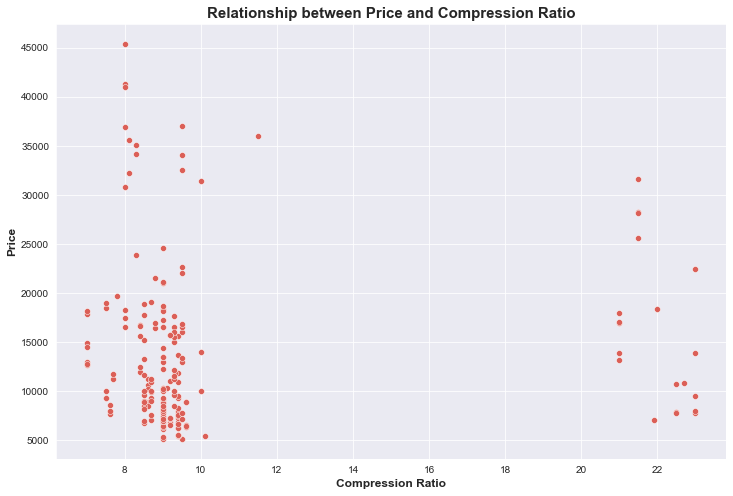

In [14]:
sns.scatterplot(x = 'compressionratio', y='price', data = car_price)
plt.title('Relationship between Price and Compression Ratio',fontweight='bold', fontsize=15)
plt.xlabel('Compression Ratio',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight: 
 - There is no relationship between compression ratio and price.

#### 2. Wheel Base vs Price

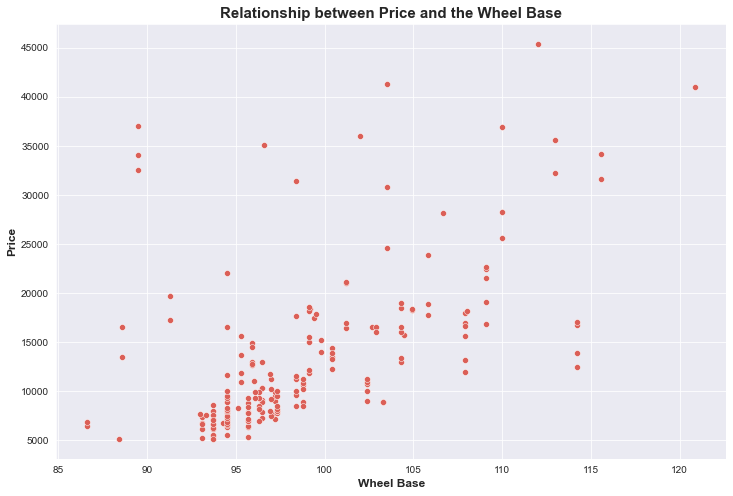

In [15]:
sns.scatterplot(x = 'wheelbase', y='price', data = car_price)
plt.title('Relationship between Price and the Wheel Base',fontweight='bold', fontsize=15)
plt.xlabel('Wheel Base',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insights:
 - The points are really scattered.
 - There seem to be a moderate positive correlationship between price and the wheel base.

#### 3. Car Length vs Price

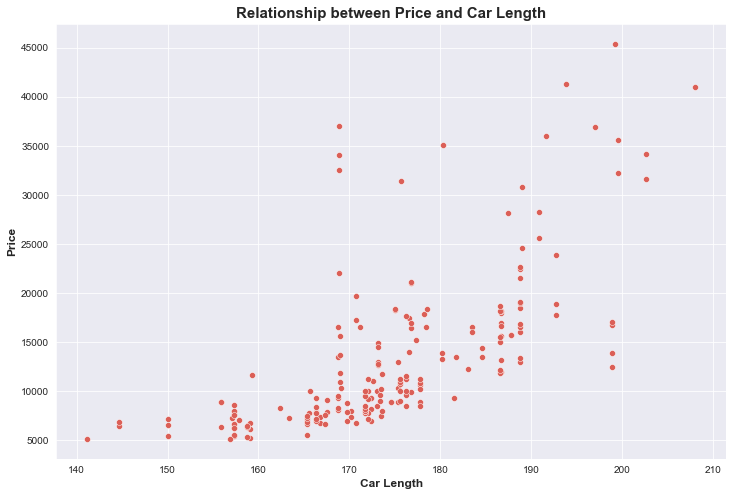

In [16]:
sns.scatterplot(x = 'carlength', y='price', data = car_price)
plt.title('Relationship between Price and Car Length',fontweight='bold', fontsize=15)
plt.xlabel('Car Length',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- There is a strong positive relationship between car length and price.

#### 4. Car Width vs Price

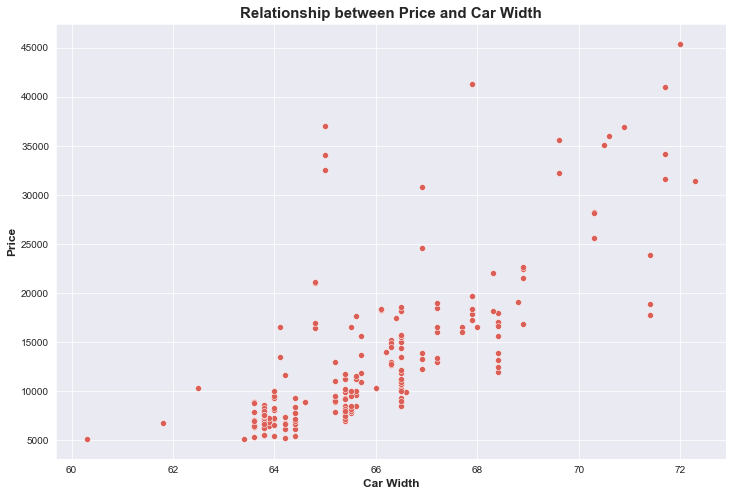

In [17]:
sns.scatterplot(x = 'carwidth', y='price', data = car_price)
plt.title('Relationship between Price and Car Width',fontweight='bold', fontsize=15)
plt.xlabel('Car Width',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- There is a positive relationship between price and car width.

#### 5. Car Height vs Price


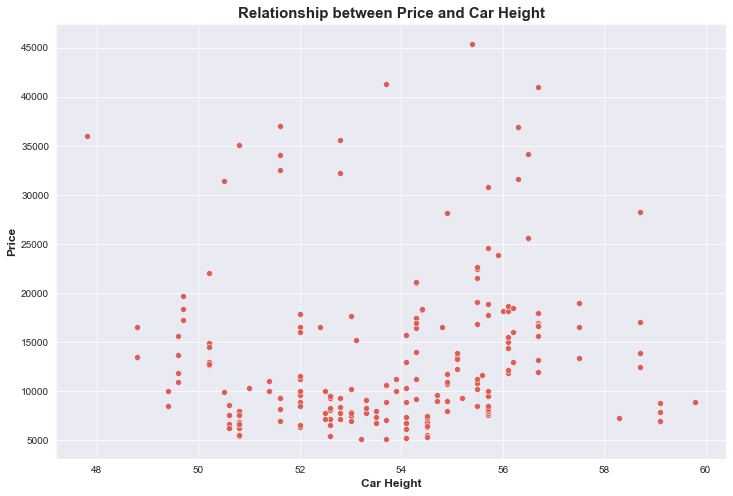

In [18]:
sns.scatterplot(x = 'carheight', y='price', data = car_price)
plt.title('Relationship between Price and Car Height',fontweight='bold', fontsize=15)
plt.xlabel('Car Height',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- There is no relationship between car height and price.

#### 6. Curb Weight vs Price

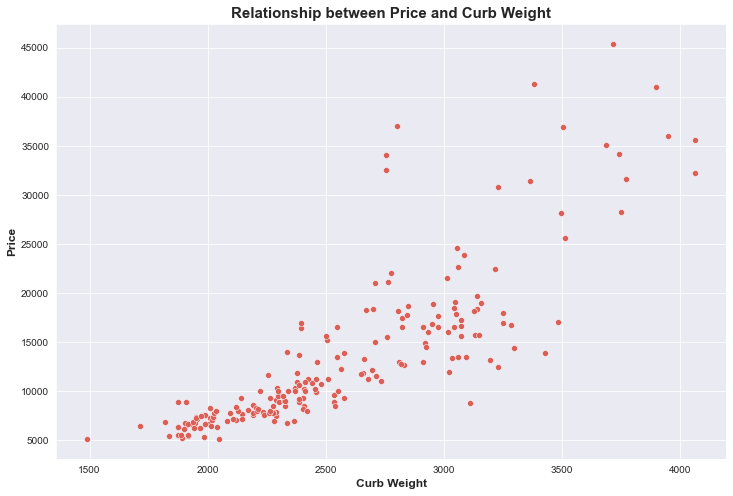

In [19]:
sns.scatterplot(x = 'curbweight', y='price', data = car_price)
plt.title('Relationship between Price and Curb Weight',fontweight='bold', fontsize=15)
plt.xlabel('Curb Weight',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- The higher the curb weight, the higher the price.

#### 7. Engine Size vs Price

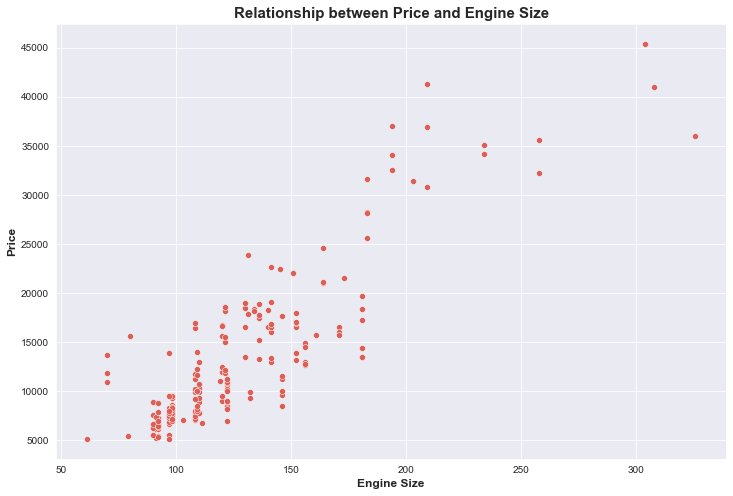

In [20]:
sns.scatterplot(x = 'enginesize', y='price', data = car_price)
plt.title('Relationship between Price and Engine Size',fontweight='bold', fontsize=15)
plt.xlabel('Engine Size',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insights:
- Most of the engine sizes are clustered around 150 to 190.
- There is also a positive relationship between the engine size and the price.

#### 8. Bore Ratio vs Price

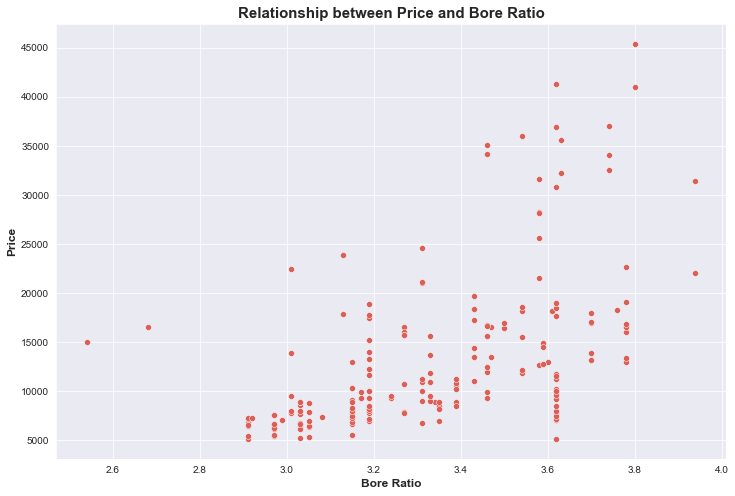

In [21]:
sns.scatterplot(x = 'boreratio', y='price', data = car_price)
plt.title('Relationship between Price and Bore Ratio',fontweight='bold', fontsize=15)
plt.xlabel('Bore Ratio',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- There is a moderate positive relationship between price and the boreratio.

#### 9. Stroke vs Price

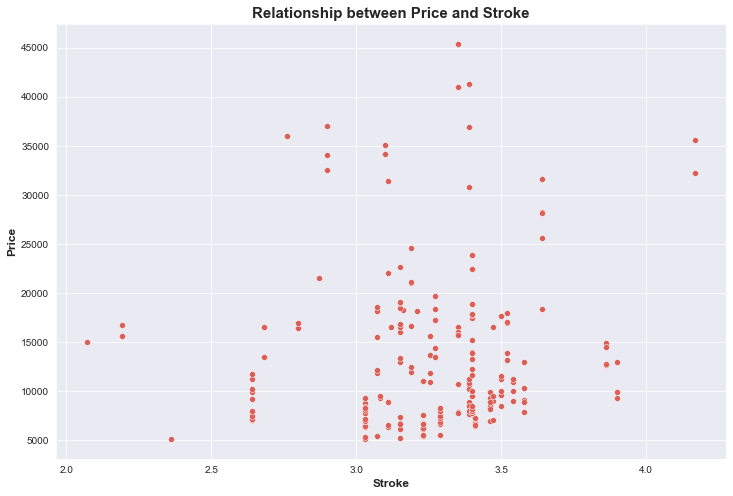

In [22]:
sns.scatterplot(x = 'stroke', y='price', data = car_price)
plt.title('Relationship between Price and Stroke',fontweight='bold', fontsize=15)
plt.xlabel('Stroke',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);


##### Insight:
- There is little or no relationship between stroke and price.

#### 10. Horse Power vs Price

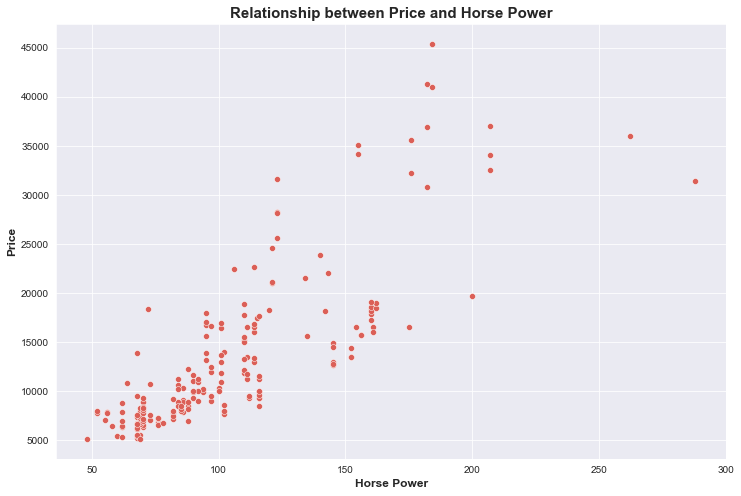

In [23]:
sns.scatterplot(x = 'horsepower', y='price', data = car_price)
plt.title('Relationship between Price and Horse Power',fontweight='bold', fontsize=15)
plt.xlabel('Horse Power',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insights:
- Most of the points are clustered between 50 -100 horse power.
- There is a positive relationship between the horse power of the car and price.

#### 11. Peakrpm vs Price

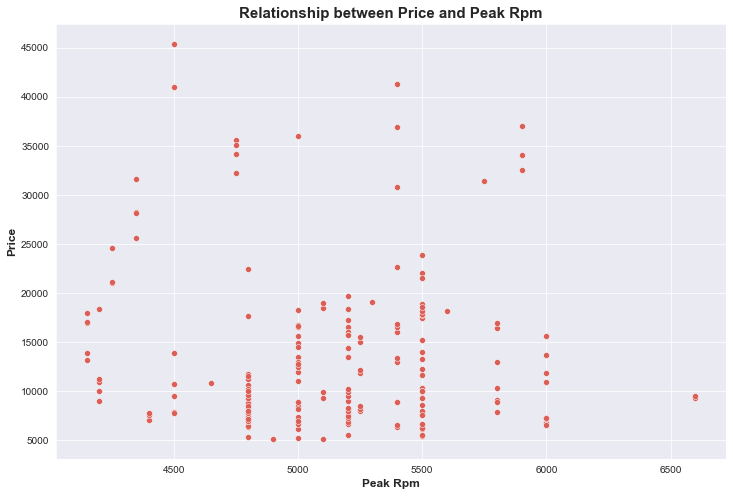

In [24]:
sns.scatterplot(x = 'peakrpm', y='price', data = car_price)
plt.title('Relationship between Price and Peak Rpm',fontweight='bold', fontsize=15)
plt.xlabel('Peak Rpm',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);


##### Insight:
- There is no relationship between price and the peakrpm.

#### 12. Citympg vs Price

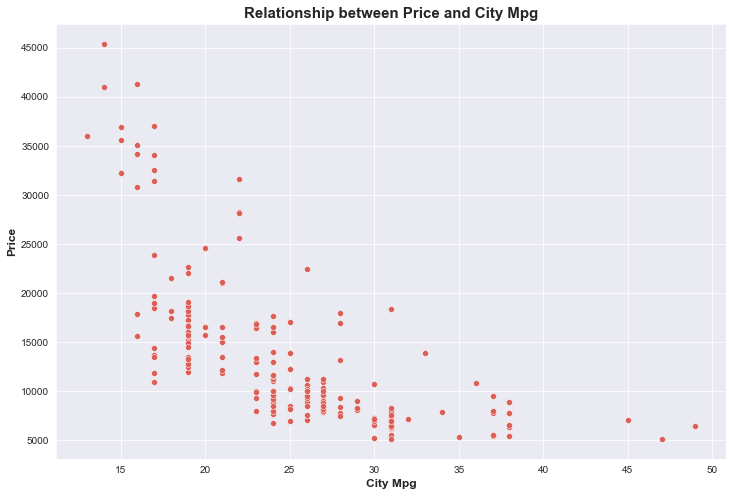

In [25]:
sns.scatterplot(x = 'citympg', y='price', data = car_price)
plt.title('Relationship between Price and City Mpg',fontweight='bold', fontsize=15)
plt.xlabel('City Mpg',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);


##### Insight:
- There is a negative relationship between price and the car's citympg i.e the lower the citympg the higher the price.

#### 13. Highwaympg vs Price

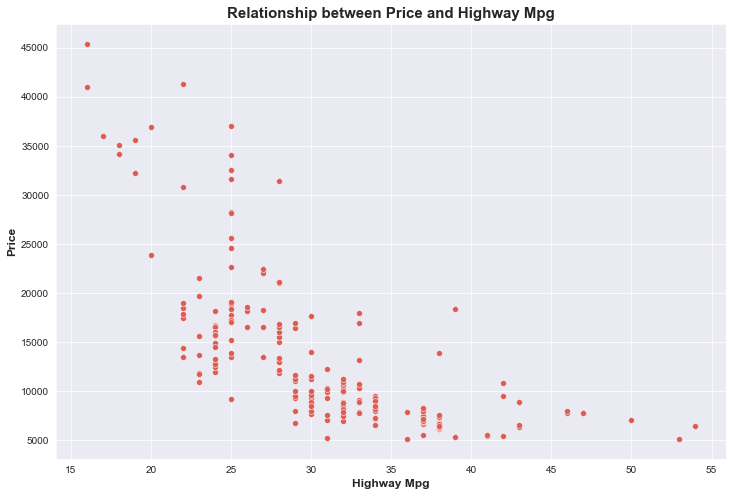

In [26]:
sns.scatterplot(x = 'highwaympg', y='price', data = car_price)
plt.title('Relationship between Price and Highway Mpg',fontweight='bold', fontsize=15)
plt.xlabel('Highway Mpg',fontweight='bold',fontsize=12)
plt.ylabel('Price',fontweight='bold',fontsize=12);

##### Insight:
- There is a negative relationship between price and highway mpg.

#### Correlation Matrix

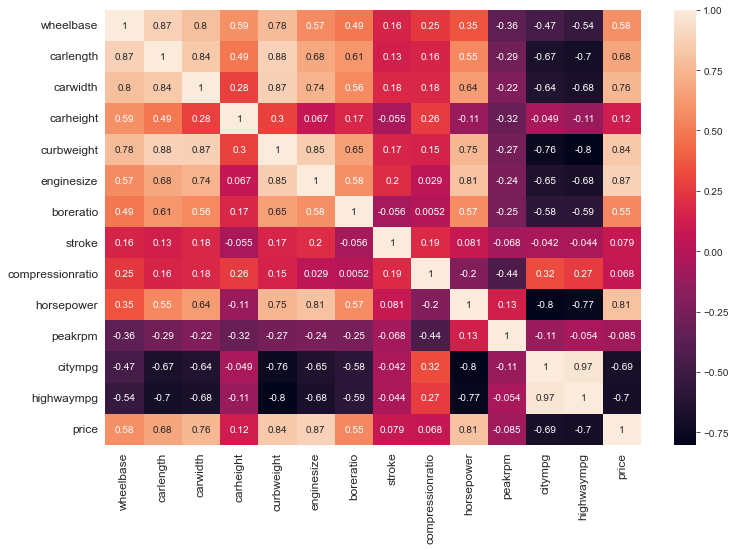

In [27]:
car_cor = numerical.corr()
sns.heatmap(car_cor, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Insights:
 
###### A. Relationship between independent variables.
- Wheelbase, carlength, carwidth and curbweight are highly positively correlated.
- Car width has high positive correlation with engine size.
- Car length has a high negative correlation with highway mpg.
- Curb weight has a high positive correlation with engine size, horsepower and high negative correlation with citympg and highway mpg.
- Engine size has high positive correlation with horsepower.
- Horsepower has a high negative correlation with citympg and highwaympg.
- Citympg and highwaympg have high positive correlation.
 
###### B. Relationship between dependent and independent variables.
- Price has a moderate positive correlation with wheelbase, carlength and boreratio.
- Price is highly positively correlated with carwidth, curbweight, enginesize and horsepower.
- Price has a moderate negative correlation with citympg and highwaympg.
- There is little or no correlation between price and compression ratio, carheight, stroke, peakrpm.

#### Exploring Categorical Variables

In [28]:
categorical_col = car_price.select_dtypes(include=['object'])
categorical_col.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### 1a. Car Name

In [29]:
#check the unique car name

car_price.CarName.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [30]:
#there are some error in the spelling of the car name. 
#renaming car name to correct the errors.

car_price['CarName'] = car_price['CarName'].replace({'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 
                                                     'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

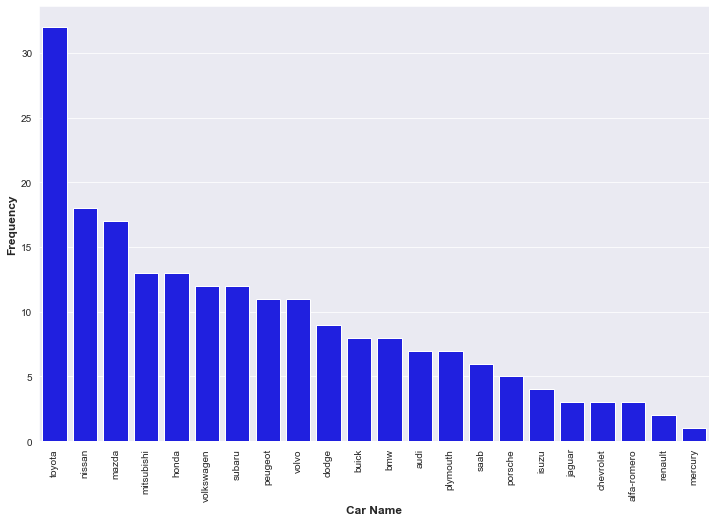

In [31]:
#count plot to visualize car name

sns.countplot(x='CarName', data=car_price, color='blue', order= car_price['CarName'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Car Name',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12);

#### 1b. Car Name vs Price

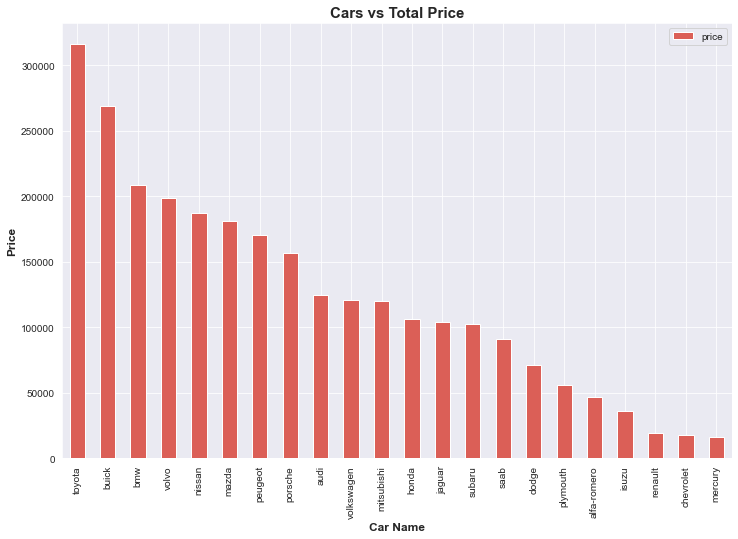

In [32]:
name_price = pd.DataFrame(car_price.groupby(['CarName'])['price'].sum().sort_values(ascending=False))

name_price.plot.bar()
plt.title('Cars vs Total Price', fontweight= 'bold', fontsize= 15)
plt.xlabel('Car Name',  fontweight= 'bold', fontsize= 12)
plt.ylabel('Price',  fontweight= 'bold', fontsize= 12);


##### Insights::
- Toyota is the most favoured car company.
- Mercury is the least favoured car company.
- Toyota, Buick and the Bmw have the highest total price.
- Mecury ahs the least total price.

##### 2a. Symboling

In [34]:
#check the unique car symboling

car_price.symboling.unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

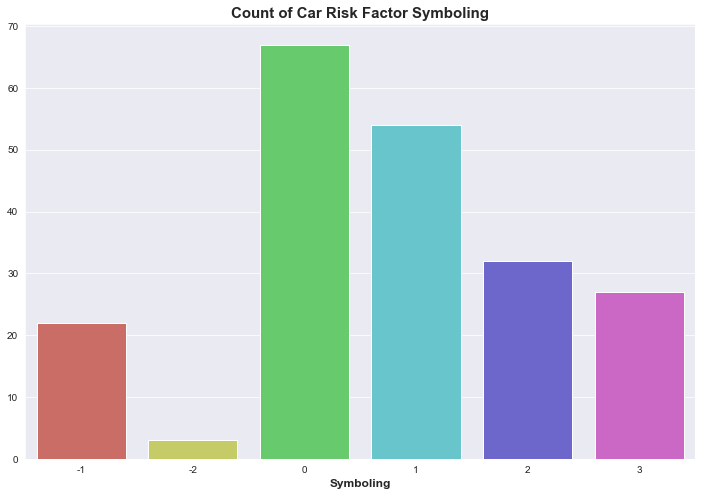

In [35]:
sy = car_price.groupby('symboling')['symboling'].count()


sns.barplot(x=sy.index, y=sy.values)
plt.xlabel('Symboling', fontweight='bold', fontsize=12)
plt.title('Count of Car Risk Factor Symboling', fontweight='bold', fontsize=15);

##### Insights:
- There are 6 unique risk factor symbols ranging from -1 to 3.
- Risk factor symbol zero is the most dominant, while risk factor symbol -2 is the least dominant.

##### 2b. Symboling vs Price

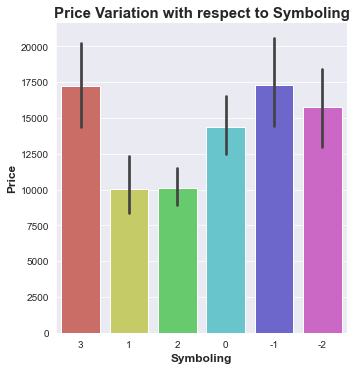

In [36]:
sns.catplot(x='symboling', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Symboling', fontweight='bold', fontsize=15)
plt.xlabel('Symboling', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);


##### Insight:
- Cars with risk factor symbol -1 have the highest price.

#### 3a. Fuel Type

In [37]:
#check the unique fuel type

car_price.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

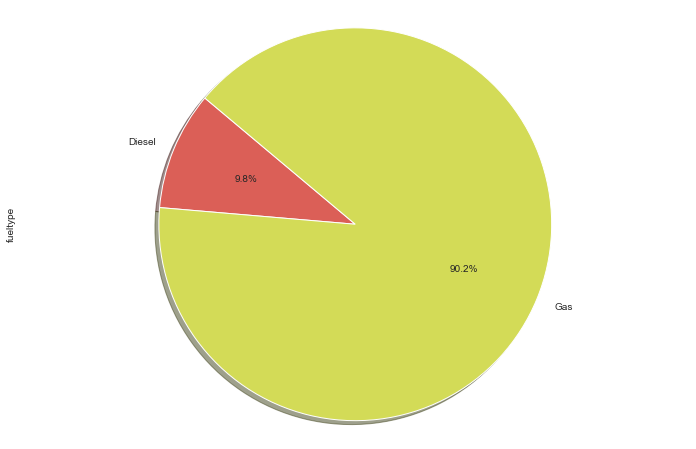

In [38]:
f_t = car_price.groupby('fueltype')['fueltype'].count()

labels = 'Diesel', 'Gas'

f_t.plot.pie(y=f_t.values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();

##### Insights:
- There are two unique fuel types: gas and diesel.
- 90.2% of the total cars use gas as fuel.

#### 3b. Fuel Type vs Price

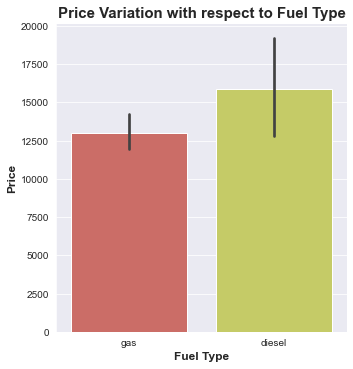

In [39]:
sns.catplot(x='fueltype', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Fuel Type', fontweight='bold', fontsize=15)
plt.xlabel('Fuel Type', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- Cars that use diesel are more expensive than cars that use gas. 

#### 4a. Aspiration

In [40]:
car_price.aspiration.unique()

array(['std', 'turbo'], dtype=object)

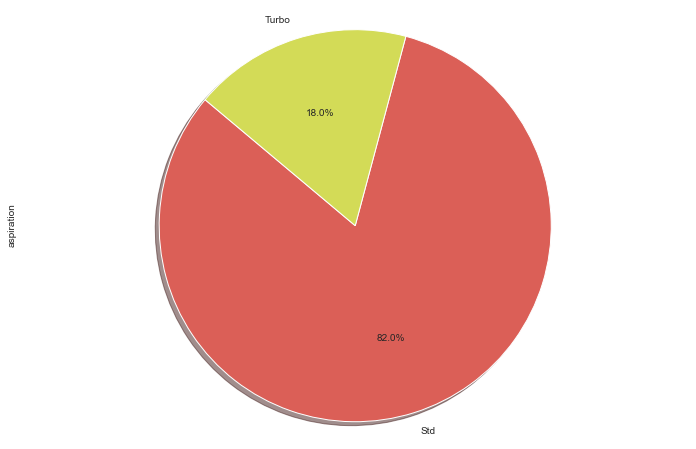

In [41]:
a_s = car_price.groupby('aspiration')['aspiration'].count()

labels = 'Std', 'Turbo'

a_s.plot.pie(y=a_s.values ,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();

##### Insights:
- There are two aspiration types: standard and turbo.
- 82.0% of the total cars have standard aspiration.

#### 4b.Aspiration vs Price

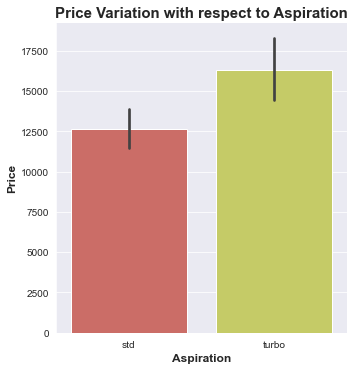

In [42]:
sns.catplot(x='aspiration', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Aspiration', fontweight='bold', fontsize=15)
plt.xlabel('Aspiration', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- Price of turbo aspiration cars is higher than that of the standard aspiration.

#### 5a. Door Number

In [43]:
car_price.doornumber.unique()

array(['two', 'four'], dtype=object)

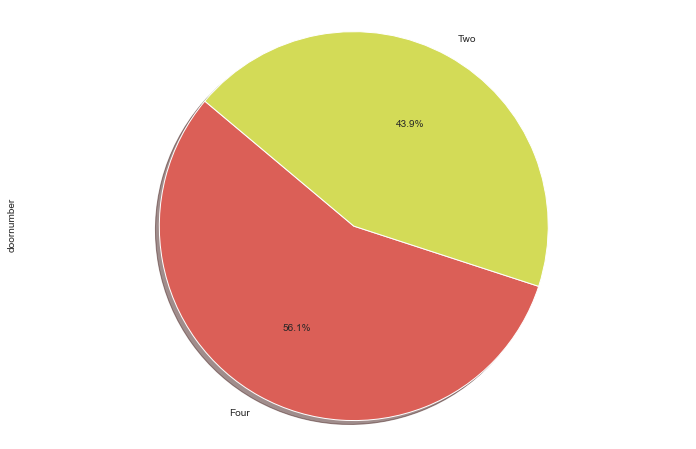

In [44]:
d_n = car_price.groupby('doornumber')['doornumber'].count()

labels = 'Four', 'Two'

d_n.plot.pie(y=d_n.values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();

##### Insights:
- The cars either have two or four doors.
- 56.1% i.e 115 cars have 4 doors while 43.9% i.e 90 cars have two doors.

#### 5b. Door Number vs Price

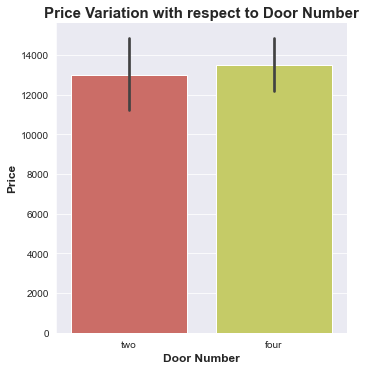

In [45]:
sns.catplot(x='doornumber', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Door Number', fontweight='bold', fontsize=15)
plt.xlabel('Door Number', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- There is a slight difference in the price of cars having two doors and cars with four doors.

#### 6a. Car Body

In [46]:
car_price.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [47]:
c_b = car_price.groupby('carbody')['carbody'].count()

c_b

carbody
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: carbody, dtype: int64

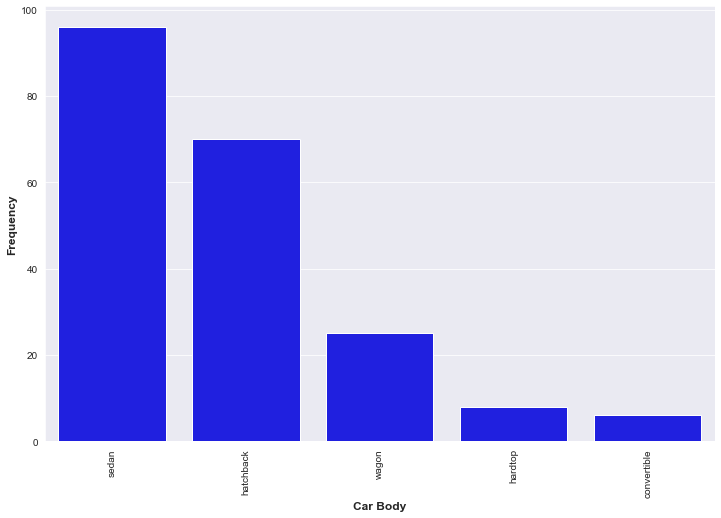

In [48]:
sns.countplot(x='carbody', data=car_price, color='blue', order= car_price['carbody'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Car Body',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12);


##### Insights:
- There are 5 unique car body types: sedan, hatchback, wagon, hardtop and convertible.
- Sedan is the most used car body type and the convertble is the least most used car body type.

#### 6b. Car Body vs Price

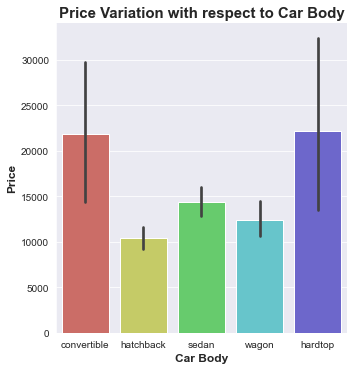

In [49]:
sns.catplot(x='carbody', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Car Body', fontweight='bold', fontsize=15)
plt.xlabel('Car Body', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);


##### Insight:
- The hardtop is the most expensive car.

#### 7a. Drive Wheel

In [50]:
car_price.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

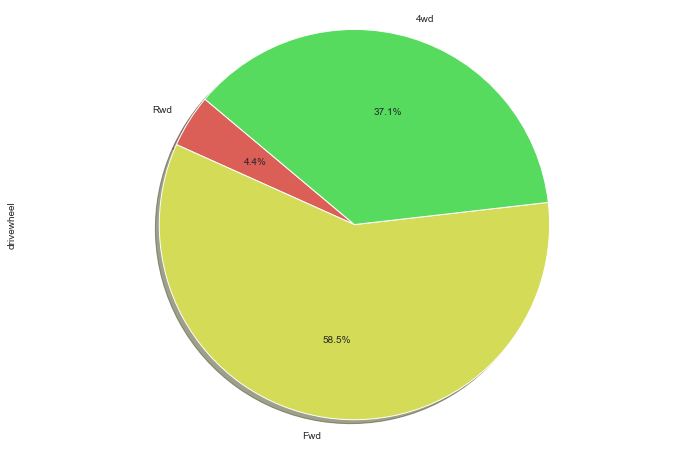

In [51]:
d_w = car_price.groupby('drivewheel')['drivewheel'].count()

labels = 'Rwd', 'Fwd', '4wd'

d_w.plot.pie(y=d_w.values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show();


##### Insight:
- Most of the cars have Fwd drive wheels.

#### 7b. Drive Wheel vs Price

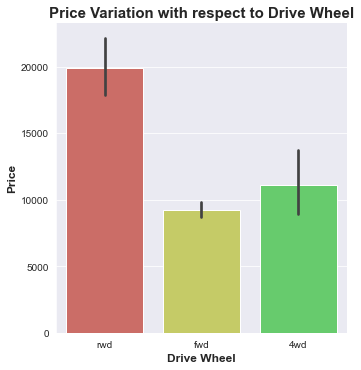

In [52]:
sns.catplot(x='drivewheel', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Drive Wheel', fontweight='bold', fontsize=15)
plt.xlabel('Drive Wheel', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- The price of cars that use rwd drive wheels is high compared to the others.

#### 8a.Engine Location

In [53]:
car_price.enginelocation.unique()

array(['front', 'rear'], dtype=object)

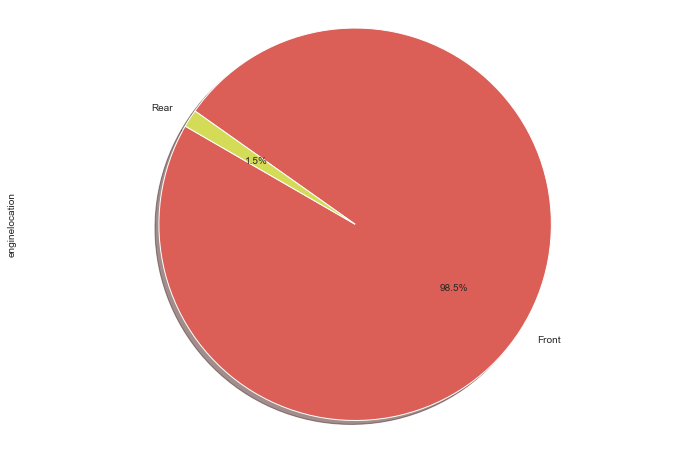

In [54]:
e_l = car_price.groupby('enginelocation')['enginelocation'].count()

labels = 'Front', 'Rear'

e_l.plot.pie(y=e_l.values,labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show();

##### Insights:
- The cars either have their engines located at the front or the at the rear.
- Almost all of the cars have their engines in front.

#### 8b. Engine Location vs Price

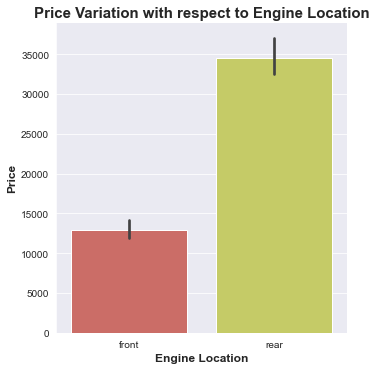

In [55]:
sns.catplot(x='enginelocation', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Engine Location', fontweight='bold', fontsize=15)
plt.xlabel('Engine Location', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- The most expensive cars have their engines at the rear.

#### 9a. Engine Type

In [56]:
e_t = car_price.groupby('enginetype')['enginetype'].count()

e_t

enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: enginetype, dtype: int64

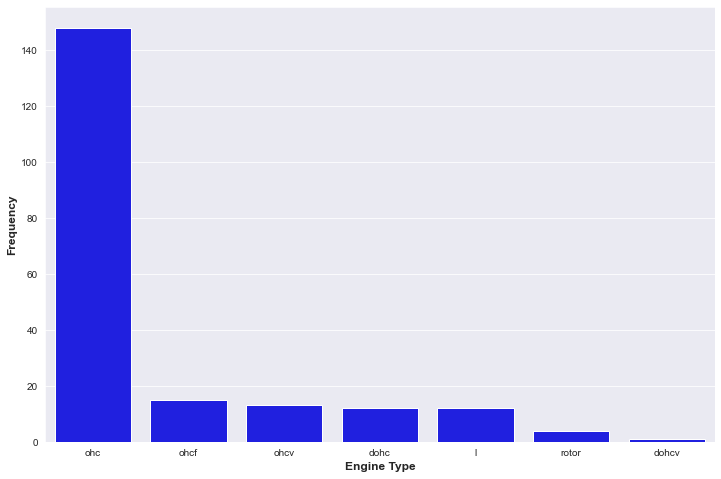

In [57]:
sns.countplot(x='enginetype', data=car_price, color='blue', order= car_price['enginetype'].value_counts().index)
plt.xlabel('Engine Type',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12);

##### Insights:
- The ohc engine type is the most common engine type.
- Just one type have engine type dohcv.

#### 9b. Engine Type vs Price

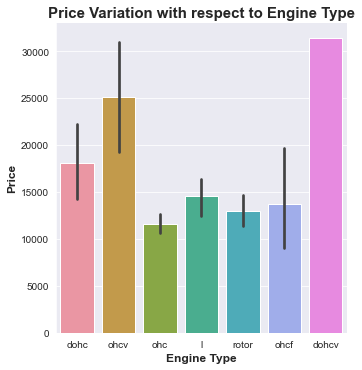

In [58]:
sns.catplot(x='enginetype', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Engine Type', fontweight='bold', fontsize=15)
plt.xlabel('Engine Type', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);


##### Insight:
- Compared to the other engine type cars, the price of cars with engine type ohcv are high compared to the other engine types.

#### 10a. Cylinder Number

In [59]:
c_n = car_price.groupby('cylindernumber')['cylindernumber'].count()

c_n

cylindernumber
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
Name: cylindernumber, dtype: int64

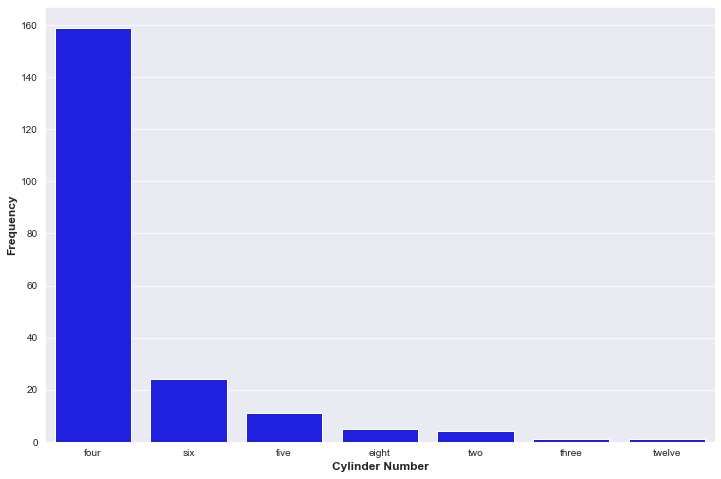

In [60]:
sns.countplot(x='cylindernumber', data=car_price, color='blue', order= car_price['cylindernumber'].value_counts().index)
plt.xlabel('Cylinder Number',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12);

##### Insights:
- There is only one car having cylinder number 3 and 12.
- Most cars have cylinder number 4.


#### 10b. Cylinder Number vs Price

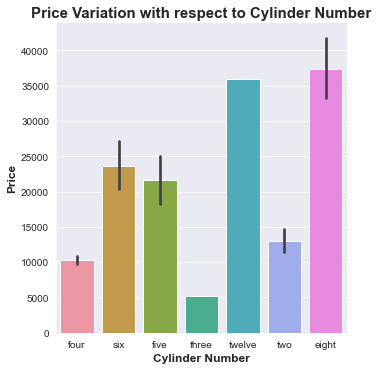

In [61]:
sns.catplot(x='cylindernumber', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Cylinder Number', fontweight='bold', fontsize=15)
plt.xlabel('Cylinder Number', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);


##### Insight:
- Cars with engine number eight are the most expensive.

#### 11a. Fuel System

In [62]:
f_s = car_price.groupby('fuelsystem')['fuelsystem'].count()

f_s


fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: fuelsystem, dtype: int64

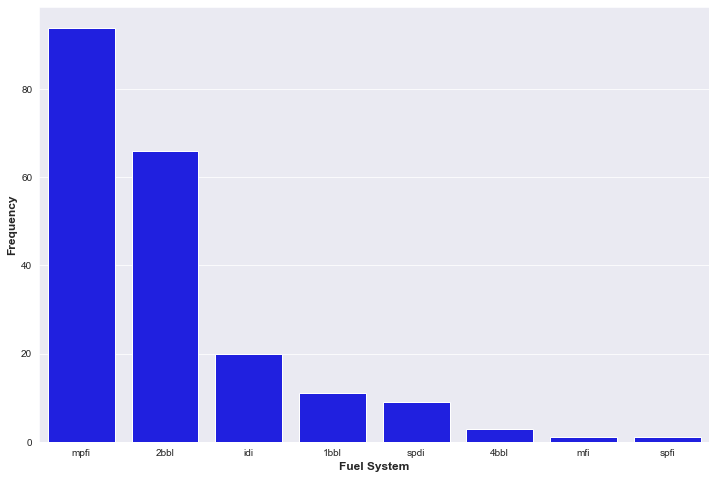

In [63]:
sns.countplot(x='fuelsystem', data=car_price, color='blue', order= car_price['fuelsystem'].value_counts().index)
plt.xlabel('Fuel System',fontweight='bold',fontsize=12)
plt.ylabel('Frequency',fontweight='bold',fontsize=12);


##### Insights:
- There is only one car having fuel system mfi and spfi.
- Most of the cars have fuel system mpfi.

#### 11b. Fuel System vs Price

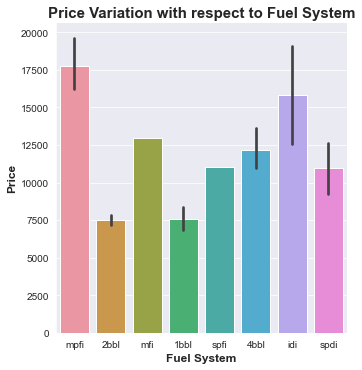

In [64]:
sns.catplot(x='fuelsystem', y='price', data = car_price, kind='bar')
plt.title('Price Variation with respect to Fuel System', fontweight='bold', fontsize=15)
plt.xlabel('Fuel System', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

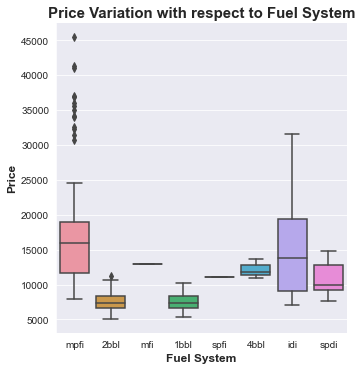

In [65]:
#explore further using the box plot to understand what is happening between mpfi and idi fuel systems.

sns.catplot(x='fuelsystem', y='price', data = car_price, kind='box')
plt.title('Price Variation with respect to Fuel System', fontweight='bold', fontsize=15)
plt.xlabel('Fuel System', fontweight='bold', fontsize=12)
plt.ylabel('Price', fontweight='bold', fontsize=12);

##### Insight:
- Cars with fuel system idi are the most expensive.
- There is presence of outliers in cars with fuel system mpfi.

#### Building Model for Car Price Prediction

#### Data Preparation

In [66]:
#Split dataset into X(Features) and y(Label)

X = car_price.iloc[:, 0:24]
y = car_price['price']

In [67]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [68]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [69]:
#creating dummy variables for categorical variables

car_categorical = X.select_dtypes(include =['object'])
car_categorical.head()




#drop the categorical variables in X

X = X.drop(list(car_categorical.columns), axis=1)


In [70]:
#convert into dummies

cars_dummies = pd.get_dummies(car_categorical, drop_first=True)
cars_dummies.head()

,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
# concat the dummy variables with X

X= pd.concat([X, cars_dummies], axis=1)

In [72]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [73]:
#putting column names in a variable cols, since column name will be lost after scaling

cols= X.columns
cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-2', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_

#### Feature Scaling

In [75]:
scaler= MinMaxScaler()

X = scaler.fit_transform(X)

In [76]:
#Creating a dataframe of new X variables after scaling

X = pd.DataFrame(X, columns=[cols])
X


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.655977,0.711

In [77]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)


In [78]:
#check the shape of our split 

X_train.shape, X_test.shape

((164, 68), (41, 68))

In [79]:
y_train.shape, y_test.shape

((164,), (41,))

#### Linear Regression

In [81]:
reg= linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [82]:
reg.coef_

array([ 1.08381222e+04, -1.11543368e+04,  7.10562312e+03, -2.54326007e+03,
        1.85514400e+04,  1.55986111e+04, -4.33889249e+03,  7.84898420e+02,
       -1.72803583e+04, -3.22156596e+03,  4.60877413e+03,  3.03003764e+03,
        5.26077303e+02, -8.43109398e+02,  3.65586295e+02,  5.05227933e+02,
        5.52496770e+02,  5.42883449e+02,  3.72283120e+02,  4.39547152e+03,
        2.03841466e+03, -4.78879087e+03, -6.01099868e+03, -2.44484772e+03,
       -4.97563796e+03, -1.66775887e+03, -2.92717399e+03, -3.40925533e+03,
       -5.69954293e+03, -2.64298020e+03, -3.76960399e+03, -5.70979657e+03,
        7.12466389e+03, -2.86490831e-11,  1.39025193e+03, -4.17177425e+03,
       -3.75351524e+03, -2.73976394e+03, -1.87701576e+03, -7.52314909e+03,
        1.80865914e+03, -1.11869714e+03, -3.65440257e+03, -3.61479596e+03,
       -3.33725123e+03, -4.15740561e+03,  1.12979777e+03,  2.50900773e+03,
        7.12466389e+03, -2.27373675e-12, -3.76960399e+03,  3.84911321e+02,
        2.95288963e+03, -

In [83]:
reg.intercept_

15262.20092587389

#### Model Evaluation

In [84]:
#We are trying to see if our model is good enough to know if there is a need for regularization

lr = LinearRegression().fit(X_train, y_train)

training_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f'Linear Regression - Training set score: {training_score:.2f}')
print(f'Linear Regression - Test set score: {test_score:.2f}')

Linear Regression - Training set score: 0.98
Linear Regression - Test set score: 0.88


##### Insight:
- The training and test score shows the model is very good.

In [85]:
#model evaluation using the r2 score

prediction = reg.predict(X_test)


In [86]:
R_2 = r2_score(y_test, prediction)
print('The R-squared value for the model is:', R_2)

The R-squared value for the model is: 0.8758686929707028


###### Insight:
- The R-squared value means that 87.6% of the variability observed in the dependent variable(label) can be explained by the independent variables(features).

#### Feature Selection Using RFE

In [87]:
#RFE with 18 features

rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=18, step=1)
rfe = rfe.fit(X,y)
print('Chosen best 18 features by rfe:' , X.columns[rfe.support_])

Chosen best 18 features by rfe: MultiIndex([(          'wheelbase',),
            (          'carlength',),
            (           'carwidth',),
            (          'carheight',),
            (         'curbweight',),
            (         'enginesize',),
            (          'boreratio',),
            (             'stroke',),
            (   'compressionratio',),
            (         'horsepower',),
            (            'peakrpm',),
            (            'citympg',),
            (         'highwaympg',),
            (        'CarName_bmw',),
            (      'carbody_sedan',),
            (     'enginetype_ohc',),
            ('cylindernumber_four',),
            (    'fuelsystem_mpfi',)],
           )


In [104]:
#fit RFE to the model

RF = RandomForestRegressor(n_estimators=18, criterion='mse', random_state =0, n_jobs=-1)
RF.fit(X_train, y_train)
RF_predicted = RF.predict(X_test)


In [106]:
#model evaluation using R2 score

R_2 = r2_score(y_test, RF_predicted)
R_2

0.898633560895995

In [107]:
#RFE with 12 features

rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=12, step=1)
rfe = rfe.fit(X,y)
print('Chosen best 12 features by rfe:' , X.columns[rfe.support_])

Chosen best 12 features by rfe: MultiIndex([(       'wheelbase',),
            (       'carlength',),
            (        'carwidth',),
            (       'carheight',),
            (      'curbweight',),
            (      'enginesize',),
            (          'stroke',),
            ('compressionratio',),
            (      'horsepower',),
            (         'citympg',),
            (      'highwaympg',),
            (     'CarName_bmw',)],
           )


In [108]:
#fit RFE to the model

RF = RandomForestRegressor(n_estimators=12, criterion='mse', random_state =0, n_jobs=-1)
RF.fit(X_train, y_train)
RF_predicted2 = RF.predict(X_test)


In [109]:
#model evaluation using R2 score

R_2 = r2_score(y_test, RF_predicted2)
R_2

0.9009897212113018

In [110]:
#RFE with 6 features

rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
rfe = rfe.fit(X,y)
print('Chosen best 12 features by rfe:' , X.columns[rfe.support_])

Chosen best 12 features by rfe: MultiIndex([( 'wheelbase',),
            (  'carwidth',),
            ('curbweight',),
            ('enginesize',),
            ('horsepower',),
            ('highwaympg',)],
           )


In [111]:
#fit RFE to the model

RF = RandomForestRegressor(n_estimators=6, criterion='mse', random_state =0, n_jobs=-1)
RF.fit(X_train, y_train)
RF_predicted2 = RF.predict(X_test)


In [112]:
#model evaluation using R2 score

R_2 = r2_score(y_test, RF_predicted2)
R_2

0.8724186047648608

#### Choosing the number of  features to keep automatically 
- This will giv ethe optimal number of features to use in our model to get the best R2 score

In [124]:
rfecv = RFECV(estimator = LinearRegression(), min_features_to_select=5, step = 5, n_jobs=-1, scoring='r2', cv=5)

In [125]:
#fit the model

rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=5, n_jobs=-1,
      scoring='r2', step=5)

In [133]:
X_train2= X_train.columns[rfecv.support_]
X_train2

MultiIndex([(            'wheelbase',),
            (            'carlength',),
            (             'carwidth',),
            (            'carheight',),
            (           'curbweight',),
            (           'enginesize',),
            (            'boreratio',),
            (               'stroke',),
            (     'compressionratio',),
            (           'horsepower',),
            (              'peakrpm',),
            (              'citympg',),
            (          'CarName_bmw',),
            (        'CarName_buick',),
            (    'CarName_chevrolet',),
            (        'CarName_dodge',),
            (        'CarName_honda',),
            (        'CarName_isuzu',),
            (       'CarName_jaguar',),
            (        'CarName_mazda',),
            (      'CarName_mercury',),
            (   'CarName_mitsubishi',),
            (       'CarName_nissan',),
            (      'CarName_peugeot',),
            (     'CarName_plymouth',),


In [134]:
#to check the number of features selected

X_train2.nunique()

53

In [135]:
#check the shape of our new X train

X_train2.shape

(53,)

In [143]:
X2 = X.drop(columns=['highwaympg','symboling_-2','symboling_0','symboling_1', 'symboling_2', 'symboling_3','CarName_audi',
                    'CarName_renault','drivewheel_fwd','enginetype_dohcv','enginetype_ohc','cylindernumber_three',
                    'fuelsystem_4bbl','fuelsystem_spdi','doornumber_two'],axis=1)
y2 = car_price['price']

In [144]:
X2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spfi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [146]:
#split into test and train data

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state= 0)

In [147]:
#check the shape of our split 

X2_train.shape, X2_test.shape

((164, 53), (41, 53))

In [148]:
y2_train.shape, y2_test.shape

((164,), (41,))

#### Linear Regression

In [149]:
reg= linear_model.LinearRegression()
reg.fit(X2_train, y2_train)

LinearRegression()

In [150]:
#check the coefficient
reg.coef_

array([ 10649.75625805, -10006.70158771,   8290.94690631,  -3066.41931528,
        16069.73814513,  16605.3334276 ,  -4266.41375758,   1144.29920854,
       -13477.14697689,  -2332.49390735,   4160.61597836,   3065.86725775,
         5015.92199908,   2448.49422374,  -4741.82545035,  -5837.40683075,
        -2958.07748636,  -3891.08918938,  -1482.59934915,  -2847.07265848,
        -3107.61512092,  -5693.53292928,  -2805.00772743,  -3470.92677947,
        -5420.32573831,   7201.85864198,   1339.95468368,  -4635.88422367,
        -3648.01641218,  -2658.88550411,  -1895.03664283,  -5636.79737686,
         1803.54882503,  -3809.56787813,  -3709.34906769,  -2767.49669921,
        -3338.59909468,    768.67083973,   7201.85864198,  -3470.92677947,
         2565.97441831,  -2273.51195954,   1683.24813539,  -4463.84686888,
        -2217.7352377 ,  -2002.32425535,   3039.68755712,   1683.24813539,
         1872.66395809,   5636.79737686,     47.29307116,   1246.98409376,
         1704.07537715])

In [151]:
#check the intercept

reg.intercept_

13910.67791072353

#### Model Evaluation

In [152]:
#We are trying to see if our model is good enough to know if there is a need for regularization

lr = LinearRegression().fit(X2_train, y2_train)

training_score = lr.score(X2_train, y2_train)
test_score = lr.score(X2_test, y2_test)

print(f'Linear Regression - Training set score: {training_score:.2f}')
print(f'Linear Regression - Test set score: {test_score:.2f}')

Linear Regression - Training set score: 0.98
Linear Regression - Test set score: 0.88


In [153]:
#model evaluation using the r2 score

prediction = reg.predict(X2_test)

In [154]:
R_2 = r2_score(y2_test, prediction)
print('The R-squared value for the model is:', R_2)

The R-squared value for the model is: 0.8828888559180749


##### Conclusions:
- 3 models were used: Linear Regression, RFE and the RFECV.
- RFE with 12 features had the highest accuracy of 90.1.
- Overall,this is a very good model, and with this model we can accurately predict car price.